In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/home/saikrupananda/Downloads/Food-Truck-LineReg.csv')
df

,xlabel,ylabel
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='xlabel'>

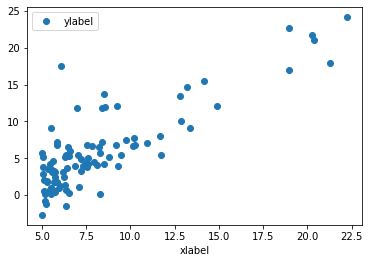

In [6]:
df.plot(x='xlabel',y='ylabel',style='o')

In [11]:
x_mean=df['xlabel'].mean()
y_mean=df['ylabel'].mean()
x_mean,y_mean

(8.159800000000002, 5.83913505154639)

In [14]:
df["x"]=df["xlabel"]-x_mean
df["y"]=df["ylabel"]-y_mean
df["x*y"]=df["x"]*df["y"]
df["x^2"]=df["x"]**2
df["y^2"]=df["y"]**2
df

,xlabel,ylabel,x,y,x*y,x^2,y^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431


In [17]:
sum_xy=df["x*y"].sum()
sum_x2=df["x^2"].sum()
sum_y2=df["y^2"].sum()

In [18]:
correlation=sum_xy/(sum_x2*sum_y2)**0.5
correlation

0.8378732325263409

In [24]:
stad_x=np.std(df["x"].tolist())
stad_y=np.std(df["y"].tolist())
stad_x,stad_y

(3.849883995922715, 5.48178525707763)

In [25]:
m=(correlation)*(stad_y/stad_x)
m

1.193033644189594

In [27]:
c=df["ylabel"].mean()-m*df["xlabel"].mean()
c

-3.8957808783118617

In [28]:
df["y_pred"]=m*df["xlabel"]+c
df

,xlabel,ylabel,x,y,x*y,x^2,y^2,y_pred
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834,3.393774
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108,2.698951
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216,6.267196
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600,4.459272
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581,3.095158
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855,3.108162
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715,2.433740
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413,5.998524
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431,12.083712


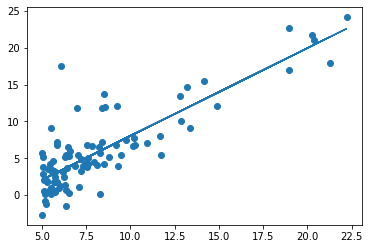

In [30]:
plt.scatter(df["xlabel"],df["ylabel"])
plt.plot(df["xlabel"],df["y_pred"])

In [31]:
ssr=sum((df["y_pred"]-(df["ylabel"].mean()))**2)
ssr

2046.3146047180403

In [32]:
sse=sum((df["ylabel"]-df["y_pred"])**2)
sse

868.5324469391843

In [33]:
sst=sse+ssr
sst

2914.8470516572247

In [34]:
cost=sse/96
cost

9.047212988949836

In [35]:
correlation**2  #R^2

0.7020315537841398